<h1 align="center"> ** Numerical - LLS** </h1>
<h2 align="center">  *Assignment 3* </h2>
<h3 align="center">  Alex Karvouniaris </h3>

In [500]:
import numpy as np
from numpy import linalg
import math
import pandas as pd
import scipy.linalg as slin

At first, we create the data points based on the instructions form.

In [574]:
x=[]
n=100
for i in range(1,101):
    x.append((i-1)/(n-1))
c=2006.787453080206
y=[]
for i in range(0,100):
    w=(1/c)*np.exp(np.sin(4*x[i]))
    y.append(w)    

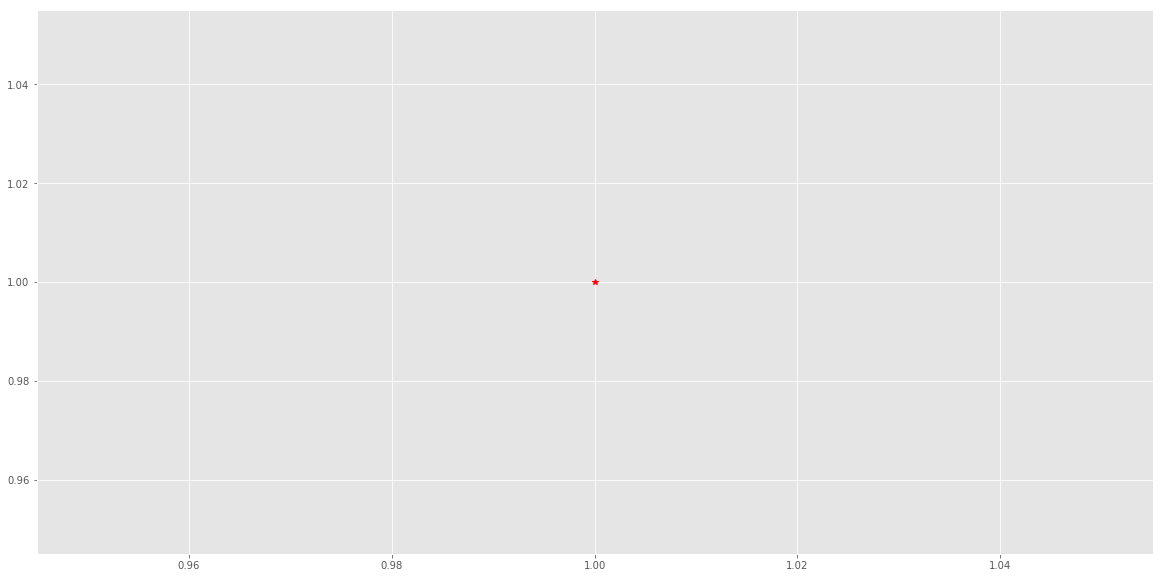

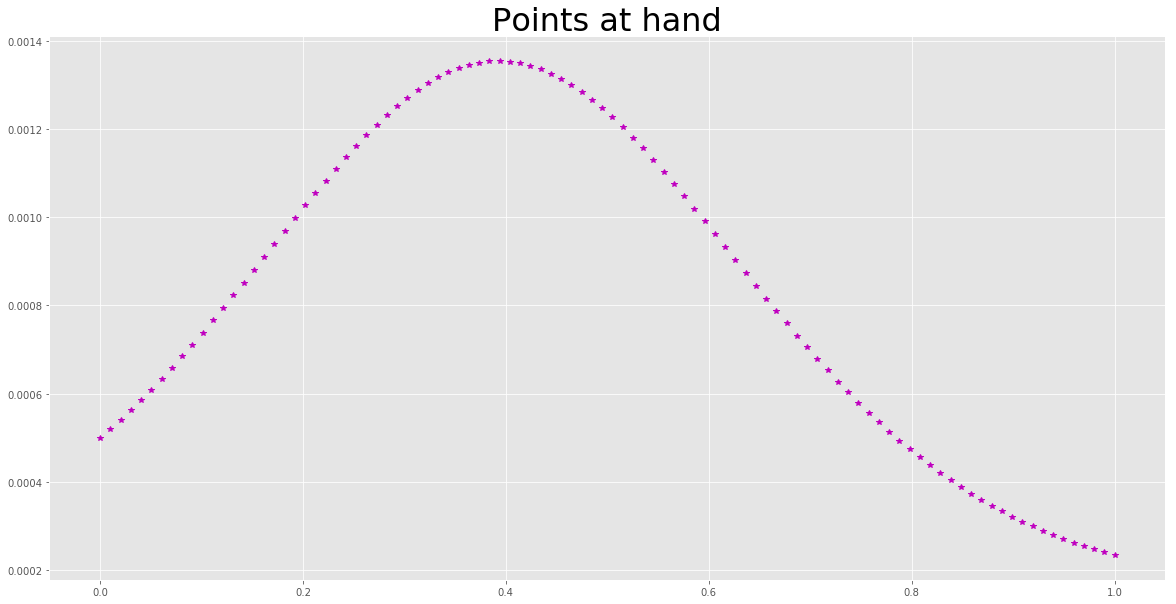

In [575]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.figure(figsize=(20,10))
plt.plot(x,y, 'm*')
plt.title('Points at hand',fontsize=32)
plt.show()

# Creation of Vandermonde matrix

In [576]:
df = pd.DataFrame(np.zeros(1500).reshape(100,15))
for i in range(100):
    for j in range(15):
        df.iloc[i,j]=x[i]**j
A=df.as_matrix(columns=None)

In [577]:
A

array([[  1.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  1.00000000e+00,   1.01010101e-02,   1.02030405e-04, ...,
          1.12817810e-24,   1.13957384e-26,   1.15108468e-28],
       [  1.00000000e+00,   2.02020202e-02,   4.08121620e-04, ...,
          4.62101750e-21,   9.33538888e-23,   1.88593715e-24],
       ..., 
       [  1.00000000e+00,   9.79797980e-01,   9.60004081e-01, ...,
          7.82777756e-01,   7.66964064e-01,   7.51469841e-01],
       [  1.00000000e+00,   9.89898990e-01,   9.79900010e-01, ...,
          8.85300222e-01,   8.76357796e-01,   8.67505697e-01],
       [  1.00000000e+00,   1.00000000e+00,   1.00000000e+00, ...,
          1.00000000e+00,   1.00000000e+00,   1.00000000e+00]])

In [548]:
np.linalg.cond(A)

22717773399.751923

# Methods for solving Linear Least Square errors problem

## Normal Equations

In [549]:
def normal_equation(A,y):
    ATA = A.T.dot(A)
    aux = np.linalg.inv(ATA)
    aux2 = aux.dot(A.T)
    res = aux2.dot(y)
    cond=np.linalg.cond(ATA)
    return res,cond

In [550]:
x_NE=normal_equation(A,y)
x_NE

(array([  4.63977765e-04,   1.56981118e-03,   1.06877446e-02,
         -1.70524392e-02,  -5.56376502e-02,   4.27772569e-01,
         -1.77975584e+00,   3.70534718e+00,  -3.32274879e+00,
          1.48227120e-01,   1.07239239e+00,   1.38502316e+00,
         -3.02060220e+00,   1.83188163e+00,  -3.87679854e-01]),
 3.1801915250612845e+17)

In [551]:
print('Condition number in normal equation case is', x_NE[1])

Condition number in normal equation case is 3.18019152506e+17


Since cond(ATA) is huge, normal equation approach is expected to have huge error too since its error is proportional to cond(ATA). While in general, under well-conditioned problems we use to opt for normal equation methods due to low complexity, in our case we are forced to use more complex methods.

# Gram Schmidt

The implementation below is coming straight from Strang's book, MIT OCW.

In [552]:
def gramschmidt(A,b):
    A1=A.copy()
    R = np.zeros((A1.shape[1], A1.shape[1]))
    Q = np.zeros(A1.shape)
    for k in range(A1.shape[1]):
        R[k, k] = np.sqrt(np.dot(A1[:, k], A1[:, k]))
        Q[:, k] = A1[:, k]/R[k, k]
        for j in range(k+1, A1.shape[1]):
            R[k, j] = np.dot(Q[:, k], A1[:, j])
            A1[:, j] = A1[:, j] - R[k, j]*Q[:, k]
    AA=np.dot(Q,R)
    condA=np.linalg.cond(AA)
    QTb=np.dot(Q.T,b)
    x=np.linalg.solve(R,QTb)
    return x,condA

In [553]:
x_GS=gramschmidt(A,y)[0]
x_GS

array([  4.98314739e-04,   1.99014497e-03,   4.20356116e-03,
        -6.01864977e-03,   7.16216150e-02,  -7.97713910e-01,
         4.28288369e+00,  -1.60670550e+01,   4.16125123e+01,
        -7.21337608e+01,   8.30574035e+01,  -6.27419359e+01,
         2.98978046e+01,  -8.14936034e+00,   9.67160737e-01])

In [555]:
print('Condition number in Gram Schmidt case is', x_GS[1])

Condition number in Gram Schmidt case is 0.00199014496583


Gram Schmidt approach is a lot less erroneous compared to normal equations, though it requires more space for storage. Another potentially problematic characteristic of the method is that it may lose orthogonality due to arithmetic issues. Both of these problems are managed with the Modified version of Gram Schmidt.

## Modified Gram-Schmidt

In [556]:
def Mod_GramS(A,y):
    A2=np.asarray(A)
    rowsA,colsA=A2.shape
    
    Q=np.zeros([rowsA,colsA])
    R=np.zeros([colsA,colsA])
    for k in range(0,colsA):
        
        R[k,k] = slin.norm(A2[:,k])
        Q[:,k] = (1.0/R[k,k])*A2[:,k]
        
        for j in range(k+1,colsA):
            R[k,j] = np.inner(A2[:,j],Q[:,k])
            A2[:,j] = A2[:,j] - R[k,j]*Q[:,k]
    QTb=np.dot(np.transpose(Q),y)
    x=np.linalg.solve(R,QTb)
    cond=np.linalg.cond(np.dot(Q,R))
    return x,cond

In [557]:
x_MGS=Mod_GramS(A,y)
x_MGS

(array([  4.98314899e-04,   1.99008434e-03,   4.20710332e-03,
         -6.10218533e-03,   7.26697756e-02,  -8.05701268e-01,
          4.32270850e+00,  -1.62028236e+01,   4.19368534e+01,
         -7.26819153e+01,   8.37096576e+01,  -6.32763726e+01,
          3.01848094e+01,  -8.24028705e+00,   9.80041621e-01]),
 22717775773.200127)

## Householder

The implementation below step from the apparent paper http://www.cs.cornell.edu/~bindel/class/cs6210-f09/lec18.pdf. 

In [578]:
def qr(A):
    m, n = A.shape
    Q = np.eye(m)
    for i in range(n - (m == n)):
        H = np.eye(m)
        H[i:, i:] = make_householder(A[i:, i])
        Q = np.dot(Q, H)
        A = np.dot(H, A)
    return Q, A
 
def make_householder(a):
    v = a / (a[0] + np.copysign(np.linalg.norm(a), a[0]))
    v[0] = 1
    H = np.eye(a.shape[0])
    H -= (2 / np.dot(v, v)) * np.dot(v[:, None], v[None, :])
    return H
 
def Householder(A,b):
    Q,R=qr(A)
    QTb=np.dot(Q.T,b)
    QTb=QTb.reshape((100,1))
    x=np.linalg.lstsq(R,QTb)[0]
    A=Q.dot(R)
    condA= np.linalg.cond(A)
    
    return x,condA

In [579]:
x_Householder=Householder(A,y)[0]
x_Householder

array([[  4.98315169e-04],
       [  1.98998443e-03],
       [  4.21287030e-03],
       [ -6.23696440e-03],
       [  7.43487267e-02],
       [ -8.18419495e-01],
       [  4.38580508e+00],
       [ -1.64170155e+01],
       [  4.24466700e+01],
       [ -7.35407925e+01],
       [  8.47287924e+01],
       [ -6.41093621e+01],
       [  3.06311639e+01],
       [ -8.38142064e+00],
       [  9.99999712e-01]])

## Singular Value Decomposition

In [581]:
def SVD(A,b):
    output=np.linalg.lstsq(A,y)[0]
    return output

In [582]:
x_SVD=SVD(A,y)
x_SVD

array([  4.98315169e-04,   1.98998443e-03,   4.21287045e-03,
        -6.23696759e-03,   7.43487641e-02,  -8.18419767e-01,
         4.38580639e+00,  -1.64170198e+01,   4.24466801e+01,
        -7.35408094e+01,   8.47288121e+01,  -6.41093780e+01,
         3.06311723e+01,  -8.38142329e+00,   1.00000008e+00])

## Results

In [583]:
print('Given that the correct coefficient is equal to 1:')
print('Normal equation estimation is',x_NE[0][-1:])
print('Gram Schmidt estimation is',x_GS[-1:])
print('Modified Gram Schmidt estimation is',x_MGS[0][-1:])
print('Householder method estimation is',x_Householder[-1:])
print('Singular value decomposition estimation is',x_SVD[-1:])

Given that the correct coefficient is equal to 1:
Normal equation estimation is [-0.38767985]
Gram Schmidt estimation is [ 0.96716074]
Modified Gram Schmidt estimation is [ 0.98004162]
Householder method estimation is [[ 0.99999971]]
Singular value decomposition estimation is [ 1.00000008]
